# Preparación del dataset de ventas de vehículos

## Librerias y ocnfiguraciones previas

In [4]:
# Tratamiento de datos
# ============================================================================================================
import pandas as pd 
import numpy as np

# Gestión de librerias
# ============================================================================================================
from importlib import reload

# Matemáticas y estadísticas
# ============================================================================================================
import math

# Preparación de datos
# ============================================================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# =============================================================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración warnings
# =============================================================================================================

import warnings
warnings.filterwarnings('ignore')


## Funciones 

In [5]:
# Funciones externas
# =============================================================================================================
from utils.funciones import multiple_plot

Este dataset extraido de *Kaggle* (nombrado: **car details v4.csv** ) contiene información sobre **vehículos usados**, los cuales serán usados para la predicción de precios de venta, a partir de las diferentes variables.

A continuación una breve descripción de las variables:

****
    
| Campo | Descripción | Ejempo |
| :--- | :--- |:--- |
| Make | Marca  | Honda |
| Model | Modelo  | Amaze 1.2 VX i-VTEC |
| Price | Precio  | 505000 |
| Year | Año  | 2017 |
| Kilometer | Kilometraje  | 87150 |
| Fuel Type | Tipo de combustible  | Petrol |
| Transmission | Tipo de transmisión  | Manual |
| Location | Ubicación  | Pune |
| Color | Color  | Grey |
| Owner | Número de propietarios previos  | First |
| Seller Type | Tipo de vendedor  | Corporate |
| Engine | Tipo de motor  | 1198 cc |
| Max Power | Potencia máxima del motor  | 87 bhp @ 6000 rpm |
| Max Torque | Torque máximo del motor  | 109 Nm @ 4500 rpm |
| Drivetrain | Tipo de tracción  | FWD |
| Length | Longitud  | 3990 |
| Width | Anchura  | 1680 |
| Height | Altura  | 1505 |
| Seating Capacity | Capacidad de asientos  | 5 |
| Fuel Tank Capacity | Capacidad del tanque de combustible  | 35 |
    
****

    
Url origen datos: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv

In [6]:
#Cargar el dataset
d=pd.read_csv('./datasets/01_car details v4.csv')

In [30]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [7]:
d['Price'] = d['Price'].astype('int16')
d['Year'] = d['Year'].astype('int16')
d['Kilometer'] = d['Kilometer'].astype('int16')
d['Length'] = d['Length'].astype('float16')
d['Height'] = d['Height'].astype('float16')
d['Width'] = d['Width'].astype('float16')
d['Seating Capacity'] = d['Seating Capacity'].astype('float16')
d['Fuel Tank Capacity'] = d['Fuel Tank Capacity'].astype('float16')

In [8]:
d.info()
d.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int16  
 3   Year                2059 non-null   int16  
 4   Kilometer           2059 non-null   int16  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float16
 16  Width 

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,-19288,2017,21614,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,-8752,2014,9464,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3996.0,1695.0,1555.0,5.0,42.0


## Limpieza de datos (Data Cleaning)

In [9]:
# Borrando columnas que no se utilizarán
d["Model"].unique()

array(['Amaze 1.2 VX i-VTEC', 'Swift DZire VDI', 'i10 Magna 1.2 Kappa2',
       ..., 'Ritz Vxi (ABS) BS-IV', 'XUV500 W8 [2015-2017]',
       'Figo Duratec Petrol ZXI 1.2'], dtype=object)

In [10]:
#Se limpia la variable Engine para convertirla en una variable numérica
#Se borra todos los valores ' cc'
d['Engine']=d['Engine'].str.replace(' cc','')
#d['Engine'].dtype

In [11]:
d['Engine'] = d['Engine'].astype('float16')
nmg = d['Engine'].nbytes*10**(-6)
print(f'{nmg} mg')

0.004118 mg


In [7]:
d.loc[d.duplicated()]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity


In [13]:
# eliminación de registros duplicados
d = d.drop_duplicates()

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

In [14]:
d.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,-19288,2017,21614,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,-8752,2014,9464,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3996.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,23392,2011,1464,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3584.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,12568,2019,-28036,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3996.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],-16080,2018,3464,Diesel,Manual,Mumbai,Grey,First,Individual,2392.0,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4736.0,1830.0,1795.0,7.0,55.0


In [15]:
# Tasa de cambio de rupias a dólares
tasa_de_cambio_USD = 0.012
tasa_de_cambio_COP = 46.77
d['Price'] = d['Price'] * tasa_de_cambio_USD
d['Price']

0      -231.456
1      -105.024
2       280.704
3       150.816
4      -192.960
         ...   
2054    -23.616
2055    154.272
2056   -265.728
2057    361.920
2058    175.680
Name: Price, Length: 2059, dtype: float64

## Visualización de datos

### Variables de entrada

In [16]:
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()#category no es necesario
print(catCols)
d[catCols].head(2)

['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Max Power', 'Max Torque', 'Drivetrain']


,Make,Model,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Max Power,Max Torque,Drivetrain
0,Honda,Amaze 1.2 VX i-VTEC,Petrol,Manual,Pune,Grey,First,Corporate,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD
1,Maruti Suzuki,Swift DZire VDI,Diesel,Manual,Ludhiana,White,Second,Individual,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD


In [17]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float16','int16']).columns.tolist()
d[numCols].head()

,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,2017,21614,1198.0,3990.0,1680.0,1505.0,5.0,35.0
1,2014,9464,1248.0,3996.0,1695.0,1555.0,5.0,42.0
2,2011,1464,1197.0,3584.0,1595.0,1550.0,5.0,35.0
3,2019,-28036,1197.0,3996.0,1745.0,1510.0,5.0,37.0
4,2018,3464,2392.0,4736.0,1830.0,1795.0,7.0,55.0


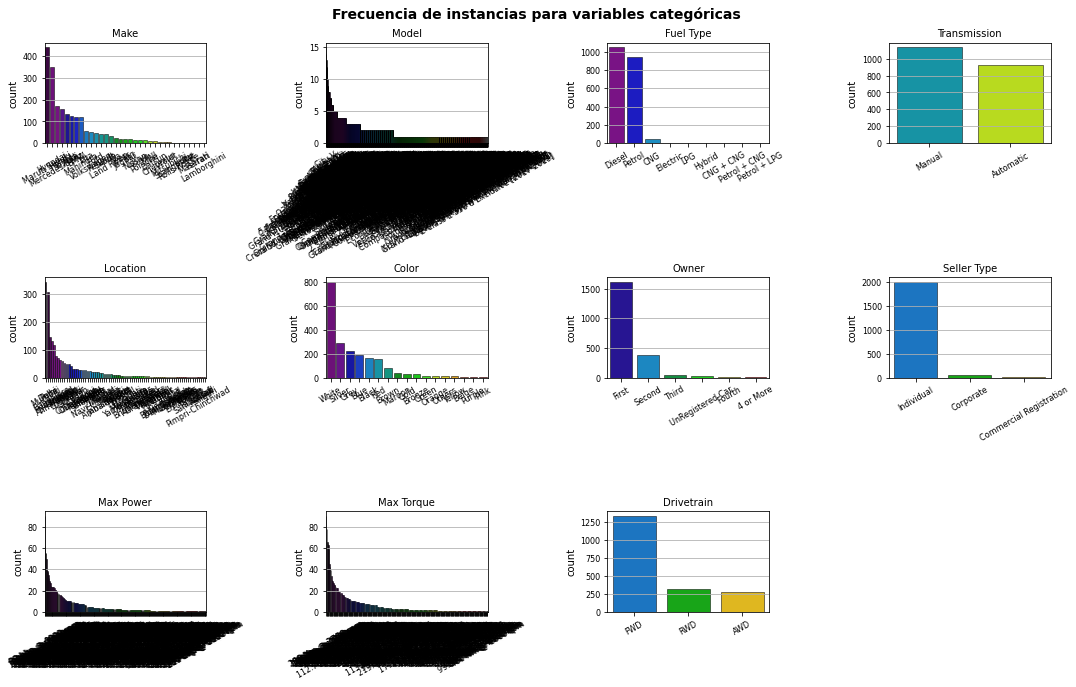

In [18]:
multiple_plot(4, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [23]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== Make ====================
Make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: count, dtype: int64

===== Model ====================
Model
X1 sDrive20d xLine                 15
Swift DZire VDI                    14
City V                             13
Fortuner 2.8 4x2 AT [2016-2020]    13
Swift DZire VXI                    12
              

Text(0.5, 1.1, 'Distribución de la variable Make vs. el precio')

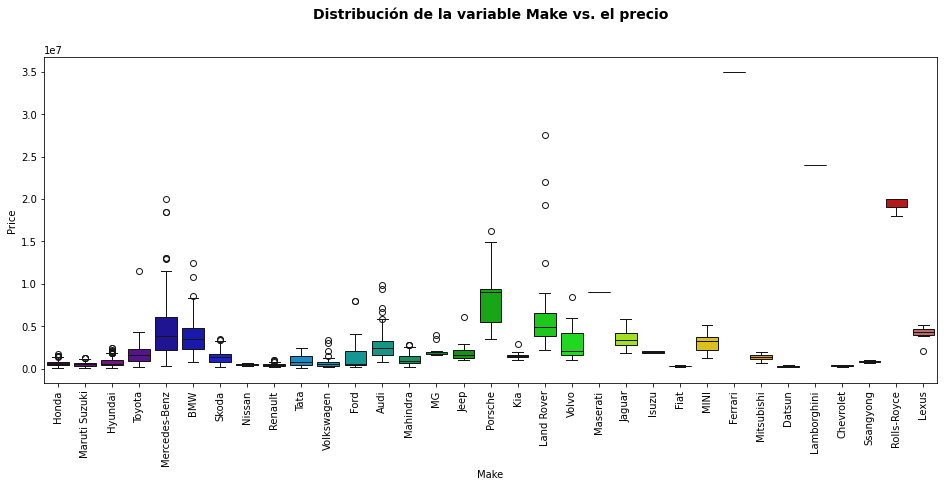

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
ax_cond = axes
sns.boxplot(data=d,
            x='Make',
            y='Price',
            ax=axes,
            palette='nipy_spectral',
            zorder=1
            )
# Personalizar el eje x
ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=90)
# Configurar título
ax_cond.set_title('Distribución de la variable Make vs. el precio', fontsize=14, fontweight="bold", y=1.1)

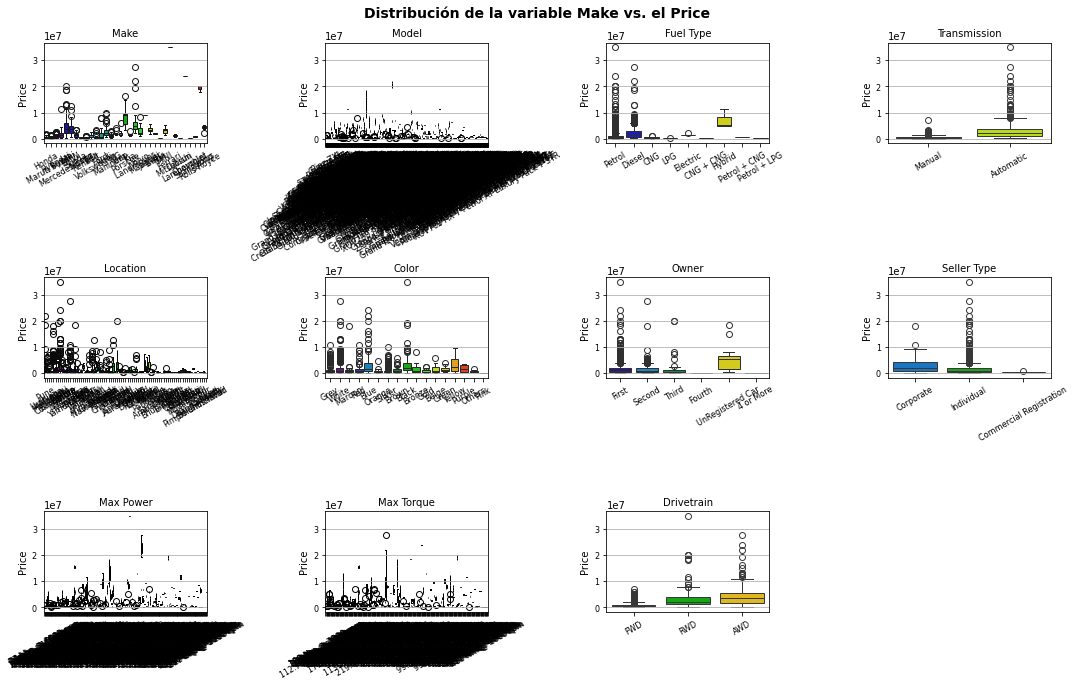

In [38]:
multiple_plot(4, d , catCols, 'Price', 'boxplot', 'Distribución de la variable Make vs. el Price',30)